# Label Characteristics

Depending on the quality of your segmentation, it will be interesting to filter your labels based on different characteristics of your dataset, like size, intensity, etc.

In this case, the result using stardist and a generalistic ML confidence-based pixel classifier generates an over-segmentation. This issue will be easily solved by setting a mean intensity threshold to remove the low-intensity labels representing negative signal cells.

## Setting up your requirements

We will use 'NumPy' to handle our arrays, 'napari' to visualize our data, 'Zarr' to load and save our results.

Also, we will use two functions from 'scikit-image', 'measure_regionprops_table' to list the properties of our labels based on the raw data, and 'util_map_array' to extract the labels that we want. 'pandas' is going to be used to handle the extracted statistics.

Last, we use 'matplotlib' to plot some graphs that will help us decide the limits to select the labels.

In [1]:
import os
import numpy as np
import napari
import pandas as pd
import tifffile as tf
import zarr as zr
import matplotlib.pyplot as plt
import time
from napari_simpleitk_image_processing import label_statistics
from skimage.measure import regionprops_table

## Loading your data
Here you have to indicate where your files are stored, you can use zarr format that will result in smaller and manageable files, but you can use tif files in the same way.

In [6]:
image_folder = r'D:\EHG\Explants\CYP17A1\Raw'
labels_folder = r'D:\EHG\Explants\CYP17A1\Labels'
results_folder = r'D:\EHG\Explants\CYP17A1\Results'

You can analize just the labels or get also statisticas based on the original image

In [3]:
images = True
labels = True

## Making the measurements
We are going to setup the `matplotlib` characteristics to plot the result of our analysis

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

Now we are going to proceed with the labels analysis. Remember that depending on the features calculated will increase the analysis time.
We are going to use [`Simple-ITK`](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) implementation in the napari plugin.

getting statistics on: C3-EH3931_SAG7_Explant-3_5-COUPTFII_6-INSL3_7-CYP17A1-1s_12x_1z_Blaze_C0.ome_Processed.aivia_Processed.aivia.tif87_cp_masks.tif29.zarr
Determining label statistics using simpleitk took 19.661191701889038 s
Statistics completed


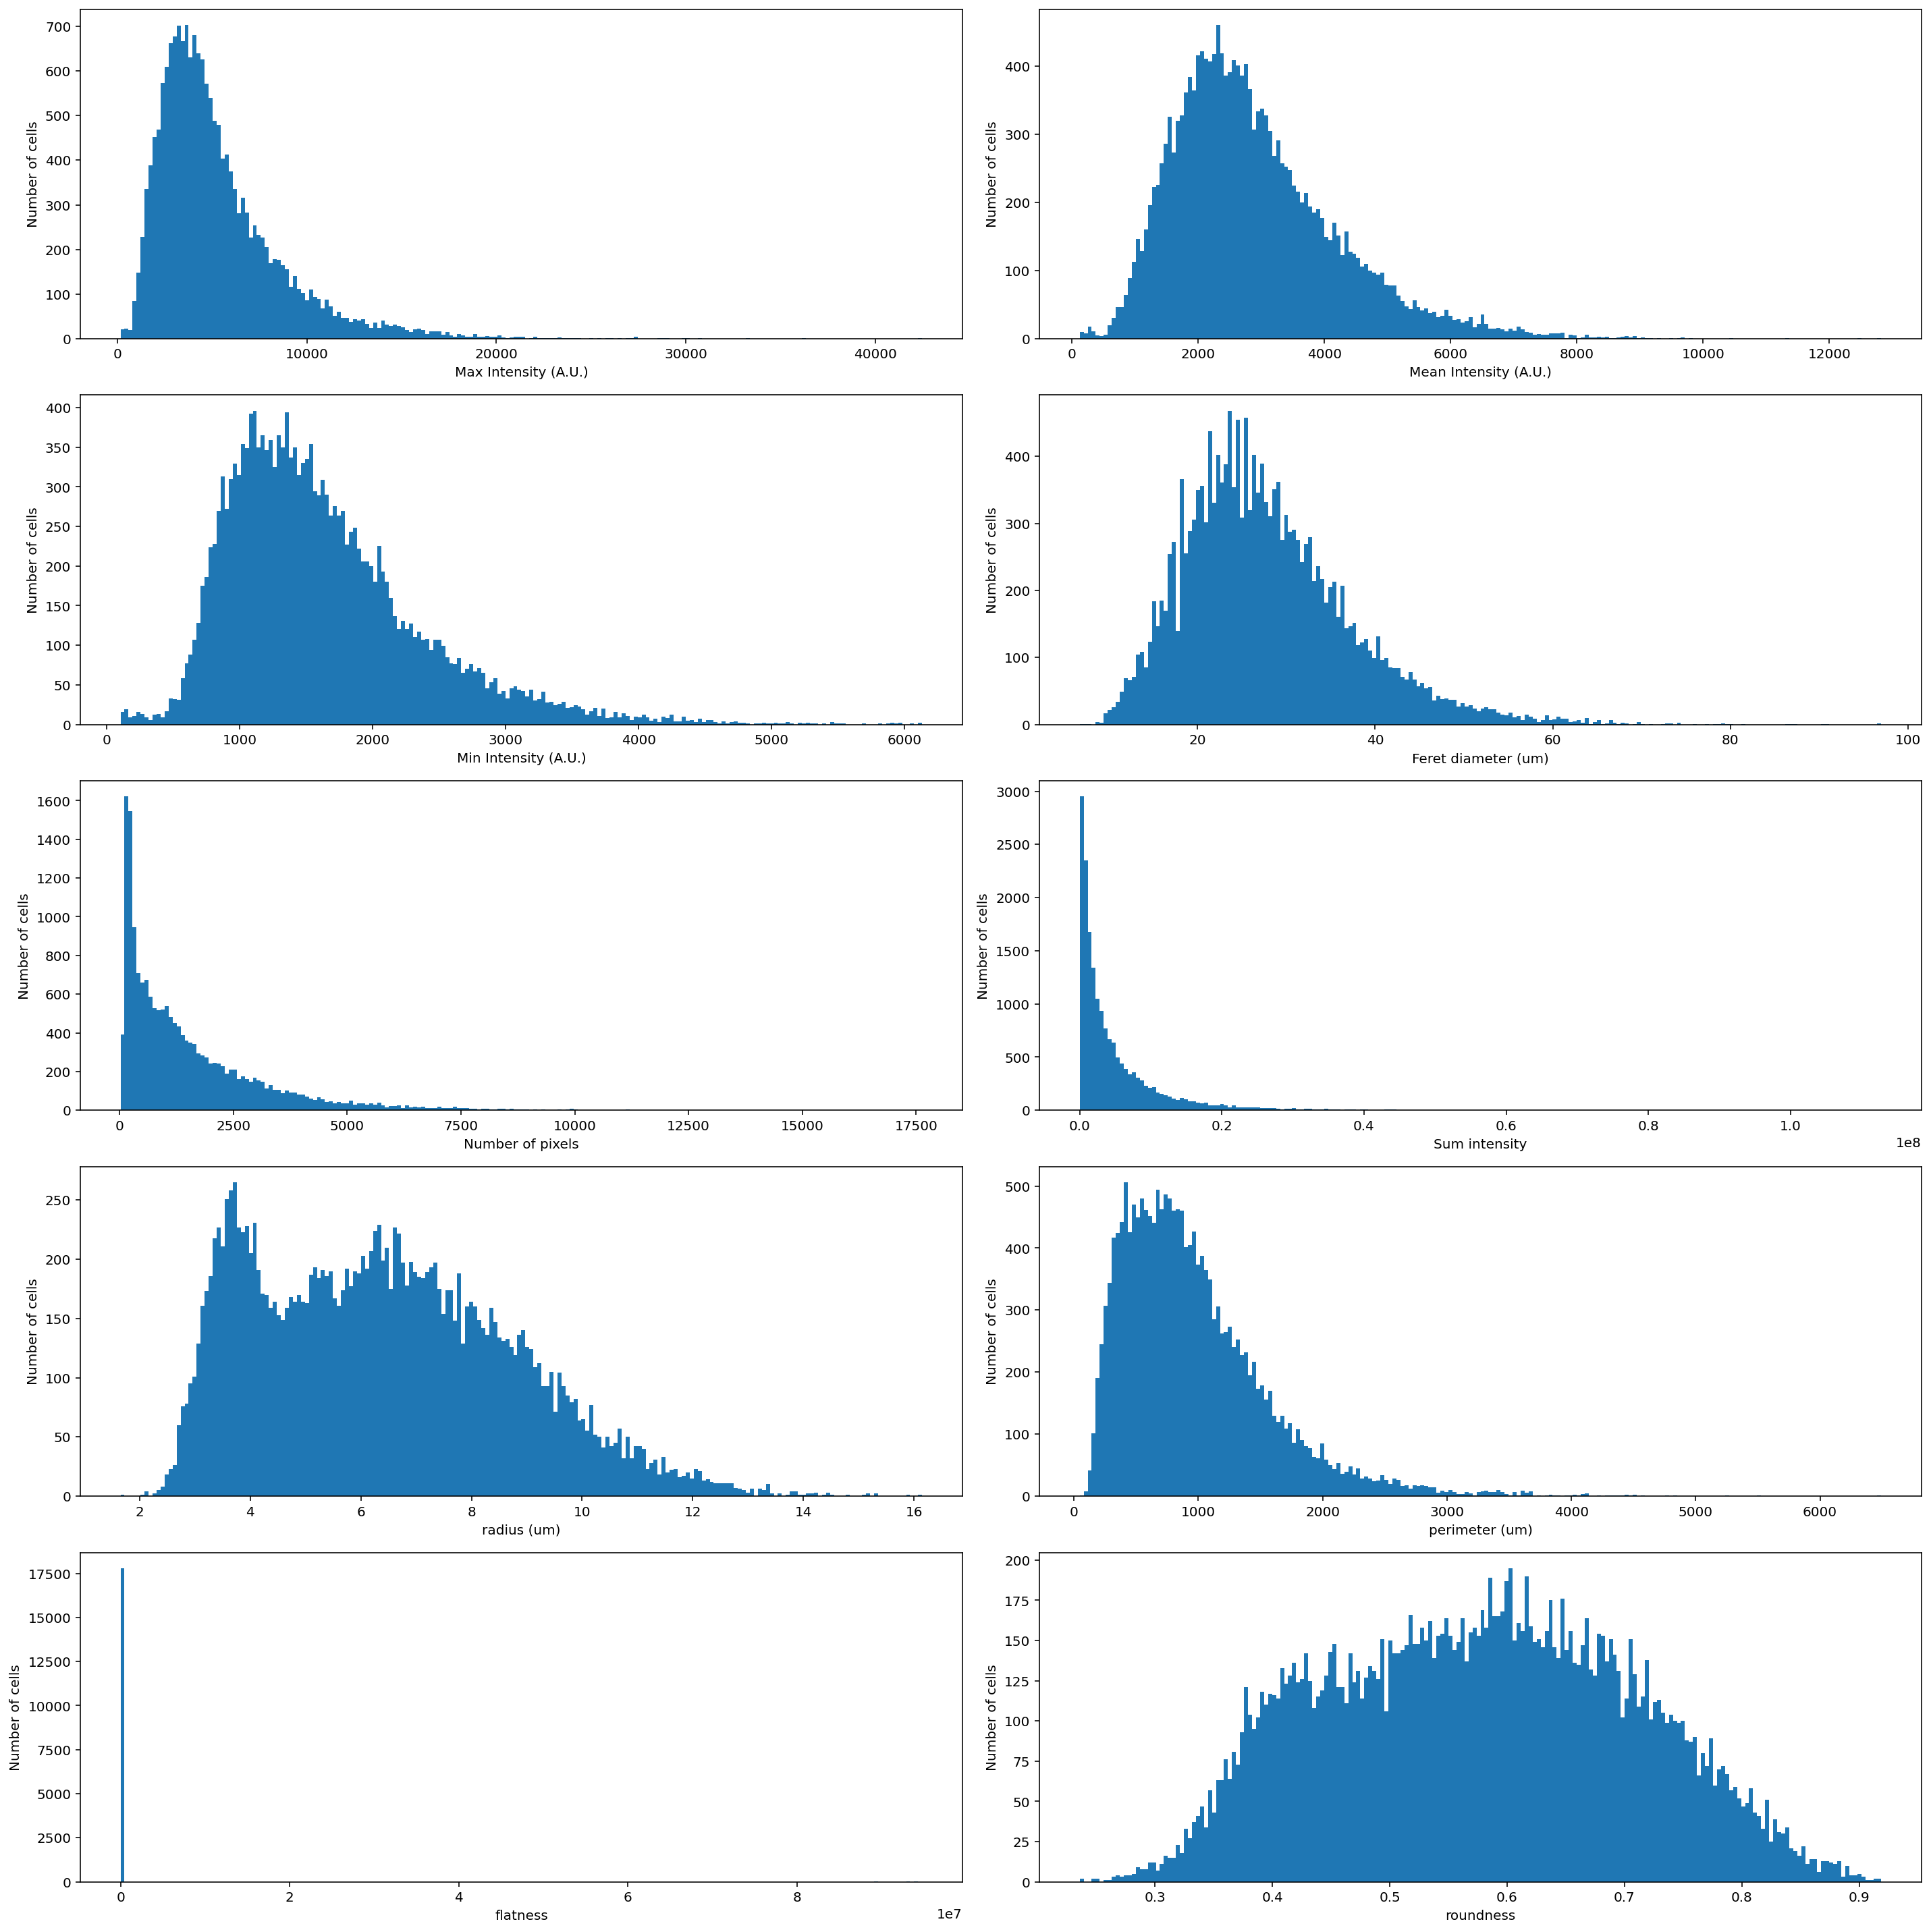

In [34]:
for label in os.listdir(labels_folder):
    print("getting statistics on: "+label)
    
    lbls = zr.load(labels_folder+"/"+label)
    short_name = os.path.splitext(label)
    
    if images:
        for image in os.listdir(image_folder):
            imgs = zr.load(image_folder+"/"+image)
            start_time = time.time()
            props = label_statistics(imgs, lbls, None, True, True, True, True, True, True)
            content = pd.DataFrame(props)
            content.to_csv(results_folder+'/'+str(short_name[0])+'.csv')
            end_time = time.time()
            print("Determining label statistics using simpleitk took " + str(end_time - start_time) + " s")
            max_vector = content['maximum']
            mean_vector = content['mean']
            min_vector = content['minimum']
            feret_vector = content['feret_diameter']
            pixel_vector = content['number_of_pixels']
            sum_vector = content['sum']
            rad_vector = content['equivalent_spherical_radius']
            per_vector = content['perimeter']
            flat_vector = content['flatness']
            rou_vector = content['roundness']
            
            fig, axes = plt.subplots(5, 2, figsize=(20,20))
            ax = axes.ravel()


            ax[0].hist(max_vector, bins=200)
            ax[0].set_ylabel('Number of cells')
            ax[0].set_xlabel('Max Intensity (A.U.)')

            ax[1].hist(mean_vector, bins=200)
            ax[1].set_ylabel('Number of cells')
            ax[1].set_xlabel('Mean Intensity (A.U.)')

            ax[2].hist(min_vector, bins=200)
            ax[2].set_ylabel('Number of cells')
            ax[2].set_xlabel('Min Intensity (A.U.)')

            ax[3].hist(feret_vector, bins=200)
            ax[3].set_ylabel('Number of cells')
            ax[3].set_xlabel('Feret diameter (um)') 

            ax[4].hist(pixel_vector, bins=200)
            ax[4].set_ylabel('Number of cells')
            ax[4].set_xlabel('Number of pixels')

            ax[5].hist(sum_vector, bins=200)
            ax[5].set_ylabel('Number of cells')
            ax[5].set_xlabel('Sum intensity')

            ax[6].hist(rad_vector, bins=200)
            ax[6].set_ylabel('Number of cells')
            ax[6].set_xlabel('radius (um)')

            ax[7].hist(per_vector, bins=200)
            ax[7].set_ylabel('Number of cells')
            ax[7].set_xlabel('perimeter (um)')

            ax[8].hist(flat_vector, bins=200)
            ax[8].set_ylabel('Number of cells')
            ax[8].set_xlabel('flatness')

            ax[9].hist(rou_vector, bins=200)
            ax[9].set_ylabel('Number of cells')
            ax[9].set_xlabel('roundness')

            fig.tight_layout()
            
            plt.savefig(results_folder+'/'+str(short_name[0])+'_statistics.png',bbox_inches='tight',pad_inches=0)
            
            
            continue
        
    else:
        start_time = time.time()
        props = regionprops_table(lbls)
        content = pd.DataFrame(props)
        content.to_csv(results_folder+'/'+str(short_name[0])+'.csv')
        end_time = time.time()
        print("Determining label statistics using Scikit-Image took " + str(end_time - start_time) + " s")
        continue
        
print("Statistics completed")   

The histograms and the CSV files for each sample are goint to be stored in your results_folder 